In [1]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Labels dictionary
labels_dict = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)',
    9: 'No passing', 10: 'No passing veh over 3.5 tons', 11: 'Right-of-way at intersection',
    12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Veh > 3.5 tons prohibited',
    17: 'No entry', 18: 'General caution', 19: 'Dangerous curve left', 20: 'Dangerous curve right',
    21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right',
    25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing',
    29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing',
    32: 'End speed + passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only',
    36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left',
    40: 'Roundabout mandatory', 41: 'End of no passing', 42: 'End no passing veh > 3.5 tons'
}

# Define the model architecture (same as the trained model)
model = nn.Sequential(
    nn.Conv2d(3, 16, (2, 2), (1, 1), 'same'),   
    nn.BatchNorm2d(16),                   
    nn.ReLU(True),                       
    nn.MaxPool2d((2, 2)),                 
    nn.Conv2d(16, 32, (2, 2), (1, 1), 'same'),  
    nn.BatchNorm2d(32),                  
    nn.ReLU(True),                       
    nn.MaxPool2d((2, 2)),                 
    nn.Conv2d(32, 64, (2, 2), (1, 1), 'same'), 
    nn.BatchNorm2d(64),                  
    nn.ReLU(True),                       
    nn.MaxPool2d((2, 2)),                
    nn.Flatten(),                        
    nn.Linear(1024, 256),                 
    nn.ReLU(True),                       
    nn.Linear(256, 43)                    
)

# Load the trained model weights
model.load_state_dict(torch.load('best_model_epoch_25.pth'))
model = model.to(torch.device('cuda'))
model.eval()

# Function to preprocess a single image and make a prediction
def predict_image(image_path):
    # Load and preprocess the image
    image = Image.open(image_path)
    image = image.resize((32, 32))
    image = np.array(image)

    plt.imshow(image)
    plt.show()
    
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension

    # Move image to the same device as the model
    image = image.to(torch.device('cuda'))

    # Make prediction
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)
        predicted_label = predicted.item()

    # Return the label
    return labels_dict[predicted_label]

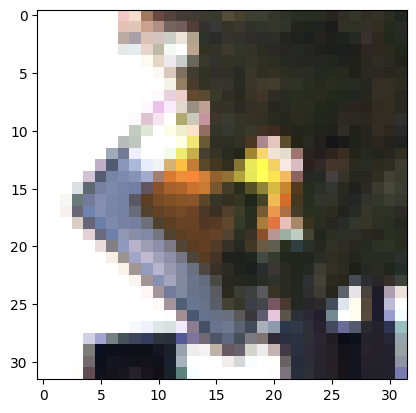

Predicted label: Priority road


E:\anaconda3\envs\pt\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv2d(input, weight, bias, self.stride,


In [3]:
cur_path = os.getcwd()
image_path = os.path.join(cur_path, 'Test', '12054.png')
predicted_label = predict_image(image_path)
print(f'Predicted label: {predicted_label}')